<a href="https://colab.research.google.com/github/moukouel/Notebooks/blob/main/TestsRecAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Generate synthetic data (features X and labels y)
X, y = make_classification(n_samples=1000, n_features=5,
                           n_informative=3, n_redundant=1,
                           random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model using the training data
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9266666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       144
           1       0.95      0.91      0.93       156

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



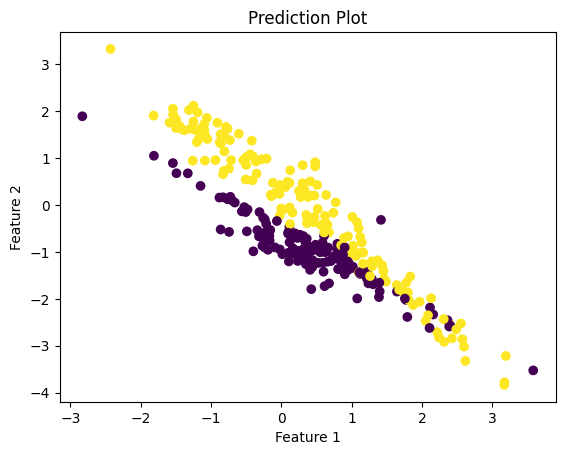

In [2]:
# prompt: plot the data

import matplotlib.pyplot as plt

# Assuming X_test[:, 0] and X_test[:, 1] are the features you want to plot
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Prediction Plot")
plt.show()


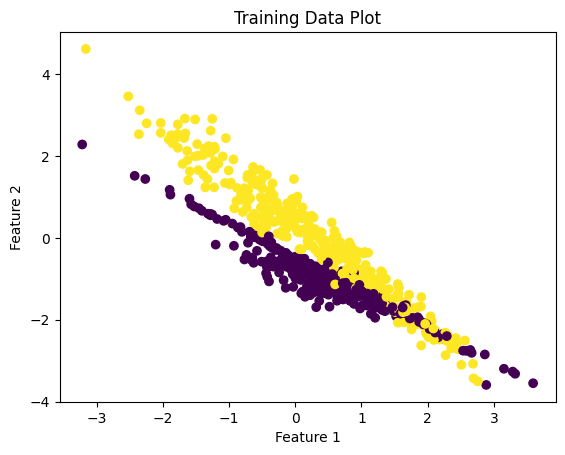

In [3]:
# prompt: Plot the train data

import matplotlib.pyplot as plt

# Assuming X_train[:, 0] and X_train[:, 1] are the features you want to plot
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Training Data Plot")
plt.show()


In [4]:
# Example: Classification Results
# True Positives (TP), False Positives (FP), and False Negatives (FN)
true_positives = 80
false_positives = 20
false_negatives = 40

# Step 1: Calculate Precision
precision = true_positives / (true_positives + false_positives)

# Step 2: Calculate Recall
recall = true_positives / (true_positives + false_negatives)

# Step 3: Calculate F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Output the results
print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))
print("F1 Score:", round(f1_score, 2))


Precision: 0.8
Recall: 0.67
F1 Score: 0.73


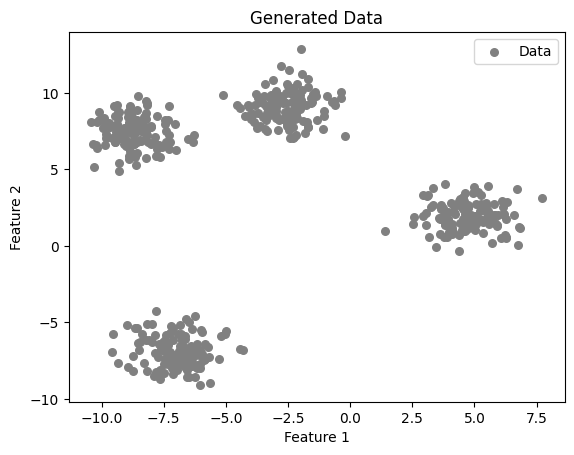

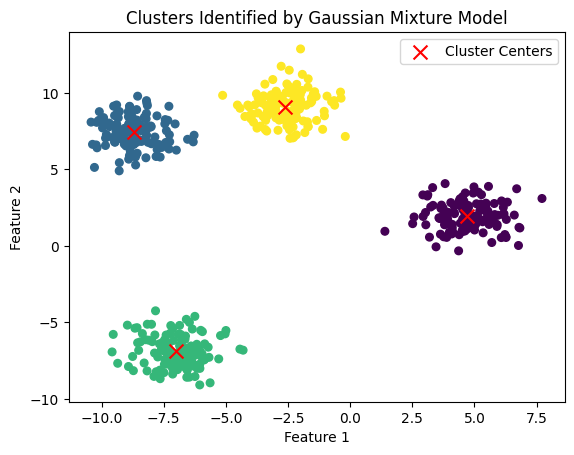

Cluster Means:
 [[ 4.72182456  1.9238556 ]
 [-8.68166179  7.45547894]
 [-7.0009649  -6.90445754]
 [-2.60242135  9.09231929]]

Covariances of Clusters:
 [[[ 1.12133276 -0.01042658]
  [-0.01042658  0.82951247]]

 [[ 0.74604625 -0.06225232]
  [-0.06225232  1.00551949]]

 [[ 0.95808233 -0.08193217]
  [-0.08193217  1.02670985]]

 [[ 0.86737869  0.04676299]
  [ 0.04676299  1.03727051]]]


In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# Generate synthetic data
n_samples = 500
random_state = 42
X, y_true = make_blobs(n_samples=n_samples, centers=3, cluster_std=1.0, random_state=random_state)

# Visualize the generated data
plt.scatter(X[:, 0], X[:, 1], c='gray', s=30, label='Data')
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=random_state)  # Assuming 3 clusters
gmm.fit(X)

# Predict cluster labels
y_gmm = gmm.predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, cmap='viridis', s=30)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=100, marker='x', label='Cluster Centers')
plt.title("Clusters Identified by Gaussian Mixture Model")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Print model parameters
print("Cluster Means:\n", gmm.means_)
print("\nCovariances of Clusters:\n", gmm.covariances_)


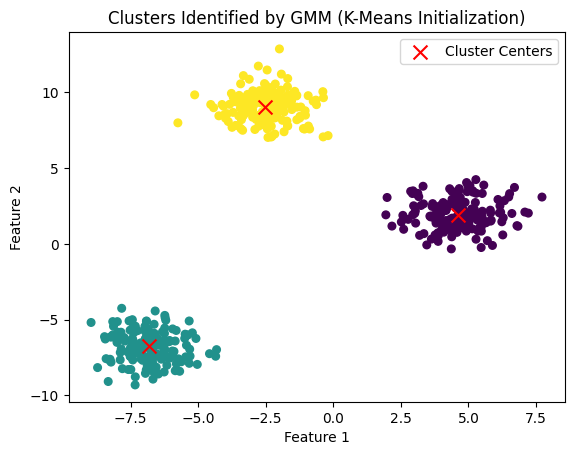

Cluster Means (Initialized with K-Means):
 [[ 4.61416263  1.93184055]
 [-6.83120002 -6.75657544]
 [-2.51336974  9.03492867]]

Covariances of Clusters:
 [[[ 1.12983272  0.0239471 ]
  [ 0.0239471   0.93604854]]

 [[ 0.77515889 -0.09007485]
  [-0.09007485  1.03680033]]

 [[ 0.90129853 -0.01320113]
  [-0.01320113  0.95416819]]]

Cluster Weights (Proportions):
 [0.334 0.332 0.334]


In [8]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data
n_samples = 500
random_state = 42
X, y_true = make_blobs(n_samples=n_samples, centers=3, cluster_std=1.0, random_state=random_state)

# Step 1: K-Means Initialization
kmeans = KMeans(n_clusters=3, random_state=random_state)
kmeans.fit(X)

# Extract the initial parameters for the GMM from K-Means
initial_means = kmeans.cluster_centers_  # K-Means cluster centers
initial_covariances = np.array([np.cov(X[kmeans.labels_ == i].T) for i in range(3)])  # Cluster covariances
initial_weights = np.array([np.sum(kmeans.labels_ == i) for i in range(3)]) / len(X)  # Cluster proportions

# Step 2: Fit a Gaussian Mixture Model using these parameters
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=random_state)

# Initialize GMM with the K-Means parameters
gmm.means_init = initial_means
gmm.weights_init = initial_weights
gmm.precisions_init = np.linalg.inv(initial_covariances)  # Inverse covariances (precision matrices)

# Fit the GMM to the data
gmm.fit(X)

# Predict cluster labels
y_gmm = gmm.predict(X)

# Visualize the GMM clustering
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, cmap='viridis', s=30)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=100, marker='x', label='Cluster Centers')
plt.title("Clusters Identified by GMM (K-Means Initialization)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Print model parameters
print("Cluster Means (Initialized with K-Means):\n", gmm.means_)
print("\nCovariances of Clusters:\n", gmm.covariances_)
print("\nCluster Weights (Proportions):\n", gmm.weights_)


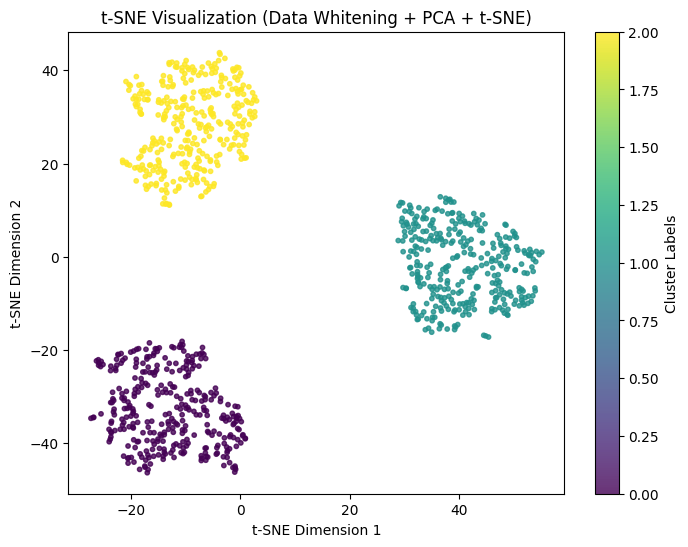

In [9]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Step 1: Generate synthetic high-dimensional data
n_samples = 1000
n_features = 10
n_clusters = 3
random_state = 42

X, y_true = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Step 2: Data Whitening (Standardization)
scaler = StandardScaler()  # Standardize features to zero mean and unit variance
X_whitened = scaler.fit_transform(X)

# Step 3: Dimensionality Reduction with PCA
pca = PCA(n_components=5, whiten=True, random_state=random_state)  # Reduce to 5 dimensions
X_pca = pca.fit_transform(X_whitened)

# Step 4: Visualization with t-SNE
tsne = TSNE(n_components=2, random_state=random_state, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_pca)

# Step 5: Plot the t-SNE results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_true, cmap='viridis', s=10, alpha=0.8)
plt.colorbar(scatter, label='Cluster Labels')
plt.title('t-SNE Visualization (Data Whitening + PCA + t-SNE)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


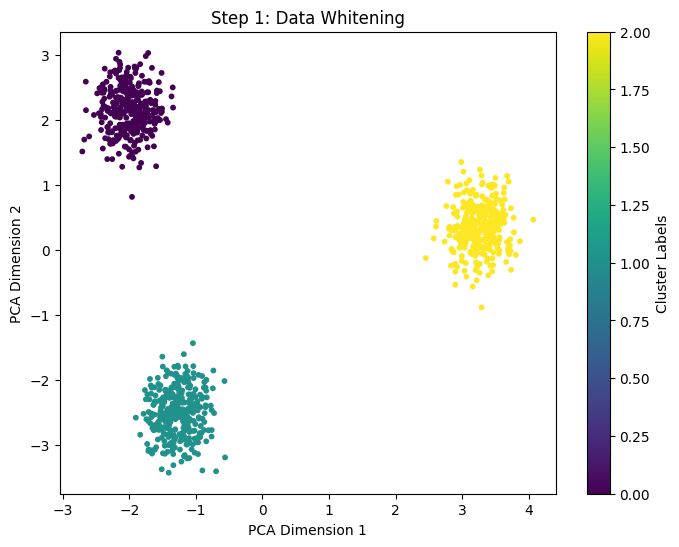

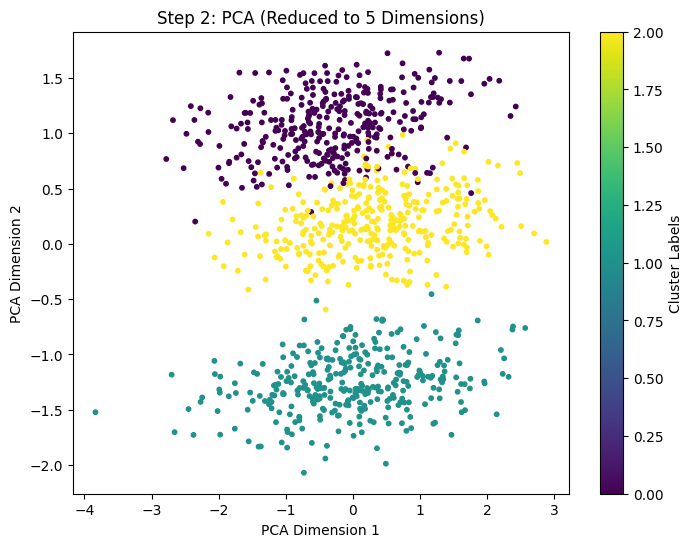

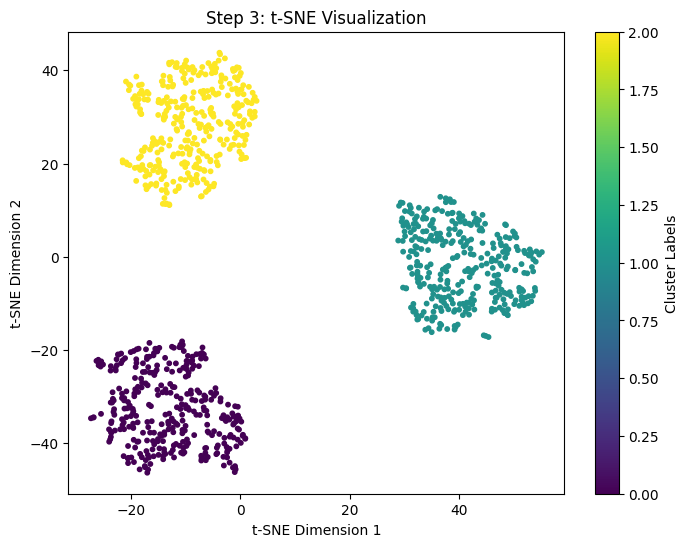

In [10]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Step 1: Generate synthetic high-dimensional data
n_samples = 1000
n_features = 10
n_clusters = 3
random_state = 42

X, y_true = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Step 2: Data Whitening (Standardization)
scaler = StandardScaler()
X_whitened = scaler.fit_transform(X)

# Plot the whitened data (reduce to 2D using PCA for visualization)
pca_for_plot = PCA(n_components=2, random_state=random_state)
X_whitened_2d = pca_for_plot.fit_transform(X_whitened)

plt.figure(figsize=(8, 6))
plt.scatter(X_whitened_2d[:, 0], X_whitened_2d[:, 1], c=y_true, cmap='viridis', s=10)
plt.title('Step 1: Data Whitening')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.colorbar(label='Cluster Labels')
plt.show()

# Step 3: Dimensionality Reduction with PCA
pca = PCA(n_components=5, whiten=True, random_state=random_state)  # Reduce to 5 dimensions
X_pca = pca.fit_transform(X_whitened)

# Plot the PCA-transformed data (reduce to 2D using PCA again)
X_pca_2d = pca_for_plot.fit_transform(X_pca)  # Visualizing the PCA step in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_true, cmap='viridis', s=10)
plt.title('Step 2: PCA (Reduced to 5 Dimensions)')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.colorbar(label='Cluster Labels')
plt.show()

# Step 4: Visualization with t-SNE
tsne = TSNE(n_components=2, random_state=random_state, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_pca)

# Plot the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_true, cmap='viridis', s=10)
plt.title('Step 3: t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster Labels')
plt.show()


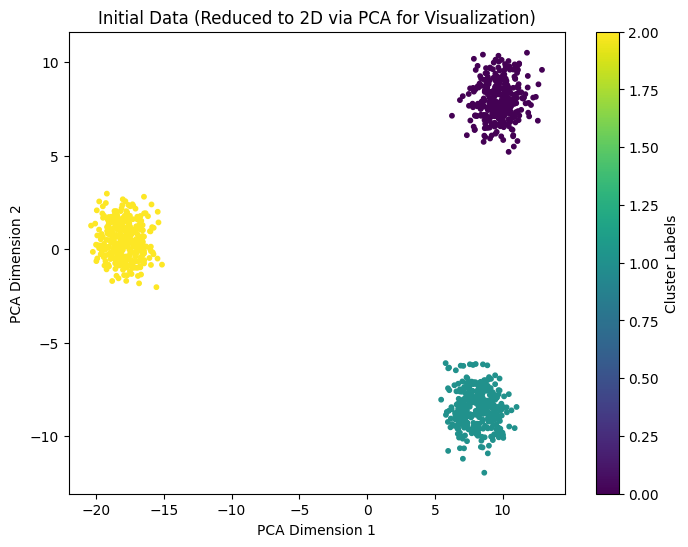

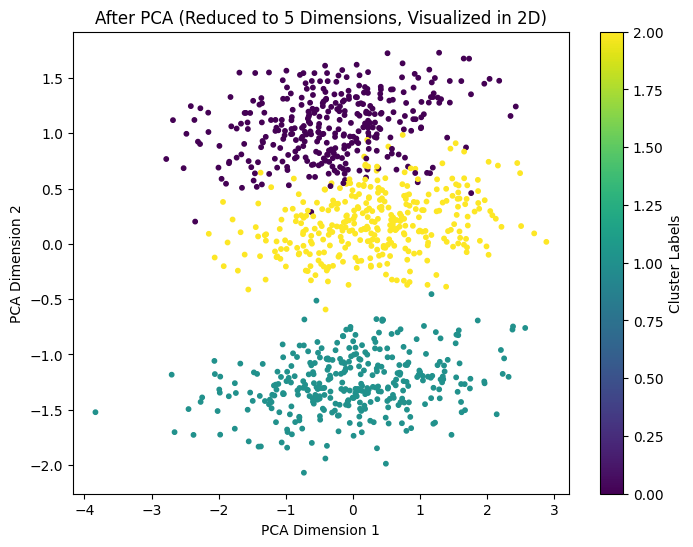

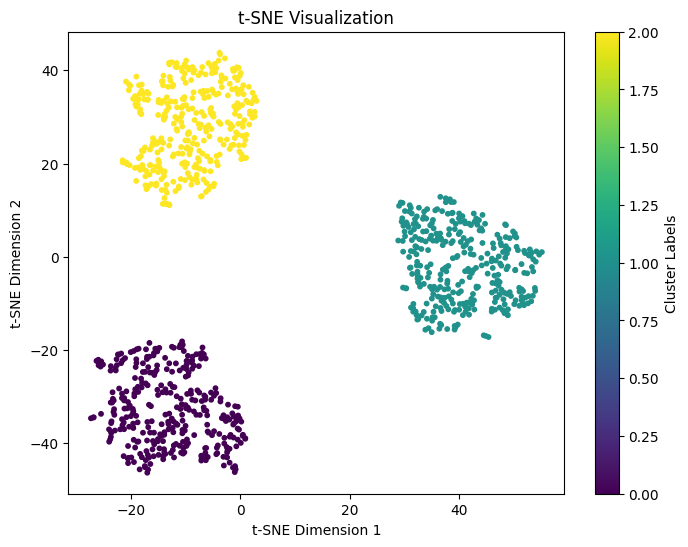

In [11]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Step 1: Generate synthetic high-dimensional data
n_samples = 1000
n_features = 10
n_clusters = 3
random_state = 42

# Generate data
X, y_true = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Plot initial data (reduce dimensions to 2D for visualization)
pca_initial = PCA(n_components=2, random_state=random_state)
X_initial_2d = pca_initial.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_initial_2d[:, 0], X_initial_2d[:, 1], c=y_true, cmap='viridis', s=10)
plt.title('Initial Data (Reduced to 2D via PCA for Visualization)')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.colorbar(label='Cluster Labels')
plt.show()

# Step 2: Define the pipeline
pipeline = Pipeline([
    ('whitening', StandardScaler()),  # Step 1: Data Whitening
    ('pca', PCA(n_components=5, whiten=True, random_state=random_state)),  # Step 2: PCA
    ('tsne', TSNE(n_components=2, random_state=random_state, perplexity=30, learning_rate=200))  # Step 3: t-SNE
])

# Fit the pipeline and transform the data
X_transformed = pipeline.fit_transform(X)

# Plot the PCA-transformed data before t-SNE (reduce to 2D for plotting)
pca_for_plot = PCA(n_components=2, random_state=random_state)
X_pca_2d = pca_for_plot.fit_transform(pipeline.named_steps['pca'].fit_transform(StandardScaler().fit_transform(X)))

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_true, cmap='viridis', s=10)
plt.title('After PCA (Reduced to 5 Dimensions, Visualized in 2D)')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.colorbar(label='Cluster Labels')
plt.show()

# Step 3: Plot t-SNE result
plt.figure(figsize=(8, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_true, cmap='viridis', s=10)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster Labels')
plt.show()


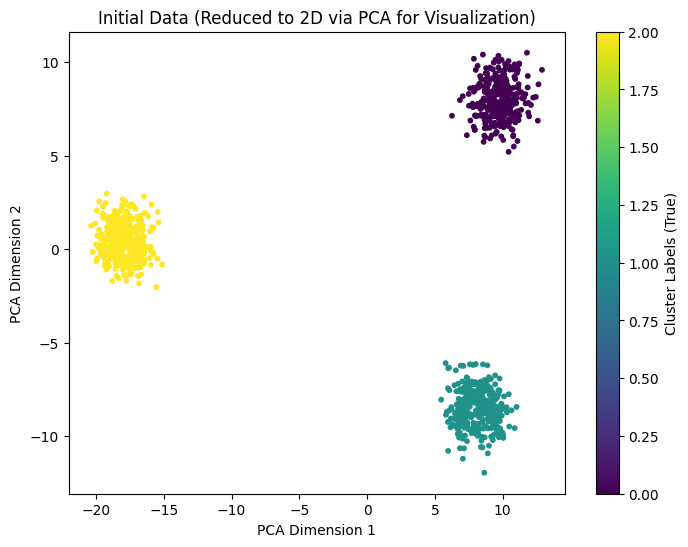

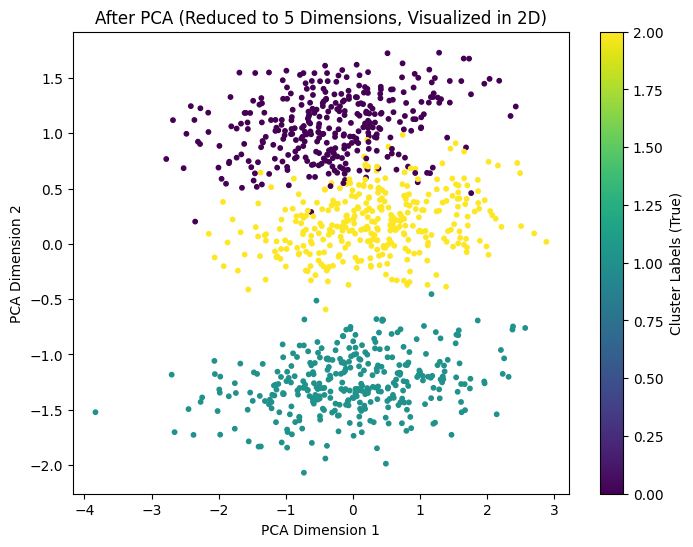

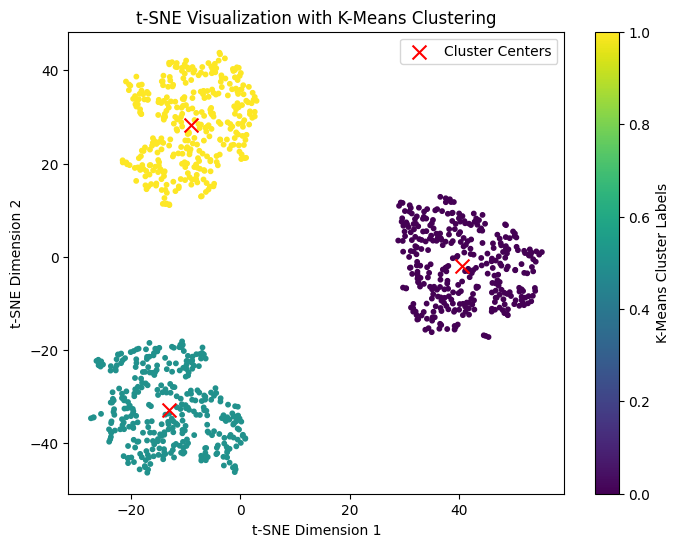

In [12]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Step 1: Generate synthetic high-dimensional data
n_samples = 1000
n_features = 10
n_clusters = 3
random_state = 42

# Generate data
X, y_true = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Plot initial data (reduce dimensions to 2D for visualization)
pca_initial = PCA(n_components=2, random_state=random_state)
X_initial_2d = pca_initial.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_initial_2d[:, 0], X_initial_2d[:, 1], c=y_true, cmap='viridis', s=10)
plt.title('Initial Data (Reduced to 2D via PCA for Visualization)')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.colorbar(label='Cluster Labels (True)')
plt.show()

# Step 2: Define the pipeline (Whitening + PCA + t-SNE)
pipeline = Pipeline([
    ('whitening', StandardScaler()),  # Step 1: Data Whitening
    ('pca', PCA(n_components=5, whiten=True, random_state=random_state)),  # Step 2: PCA
    ('tsne', TSNE(n_components=2, random_state=random_state, perplexity=30, learning_rate=200))  # Step 3: t-SNE
])

# Fit the pipeline and transform the data
X_transformed = pipeline.fit_transform(X)

# Step 3: Clustering with K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
y_kmeans = kmeans.fit_predict(X_transformed)

# Plot the PCA-transformed data (reduce to 2D using PCA for plotting only)
pca_for_plot = PCA(n_components=2, random_state=random_state)
X_pca_2d = pca_for_plot.fit_transform(pipeline.named_steps['pca'].fit_transform(StandardScaler().fit_transform(X)))

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_true, cmap='viridis', s=10)
plt.title('After PCA (Reduced to 5 Dimensions, Visualized in 2D)')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.colorbar(label='Cluster Labels (True)')
plt.show()

# Plot the t-SNE-transformed data with K-Means cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_kmeans, cmap='viridis', s=10)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=100, marker='x', label='Cluster Centers')
plt.title('t-SNE Visualization with K-Means Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='K-Means Cluster Labels')
plt.legend()
plt.show()


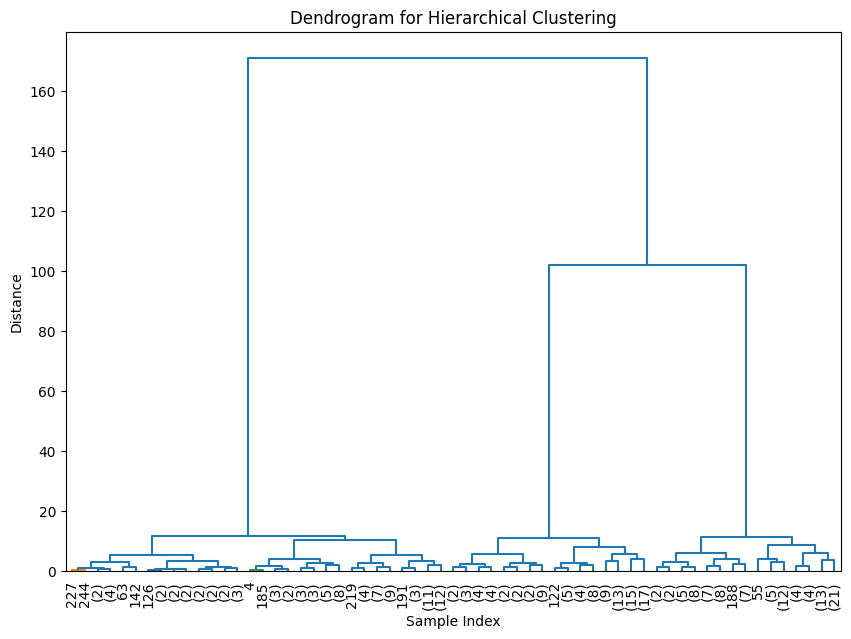

In [13]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Step 1: Generate synthetic data
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42

# Create the dataset
X, y_true = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=random_state)

# Step 2: Perform hierarchical clustering
# Use the 'linkage' method to compute hierarchical clustering
linkage_matrix = linkage(X, method='ward')  # Ward's method minimizes variance between clusters

# Step 3: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=5, leaf_rotation=90., leaf_font_size=10., color_threshold=0.5)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Step 4: Choosing the number of clusters
# You can decide the number of clusters by cutting the dendrogram at a specific height.
# For example, examine where the largest vertical gaps occur to identify meaningful clusters.


In [ ]:
# prompt: plot AgglomerativeClustering

import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# ... (Your existing code) ...

# Step 1: Generate synthetic data (if not already generated)
# ...

# Step 2: Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  # Adjust parameters as needed
y_agg = agg_clustering.fit_predict(X)

# Step 3: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_agg, cmap='viridis', s=30)  # Plot with cluster labels
plt.title("Agglomerative Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


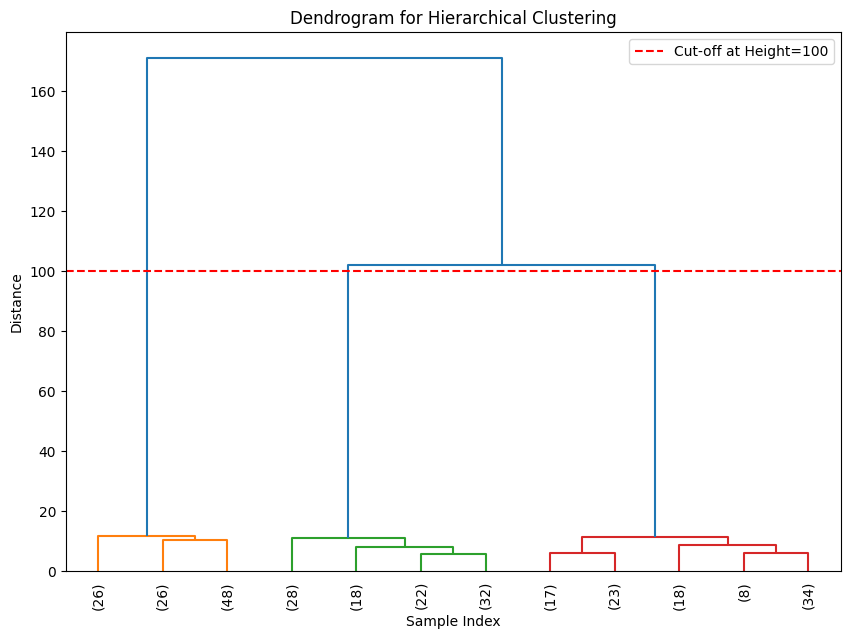

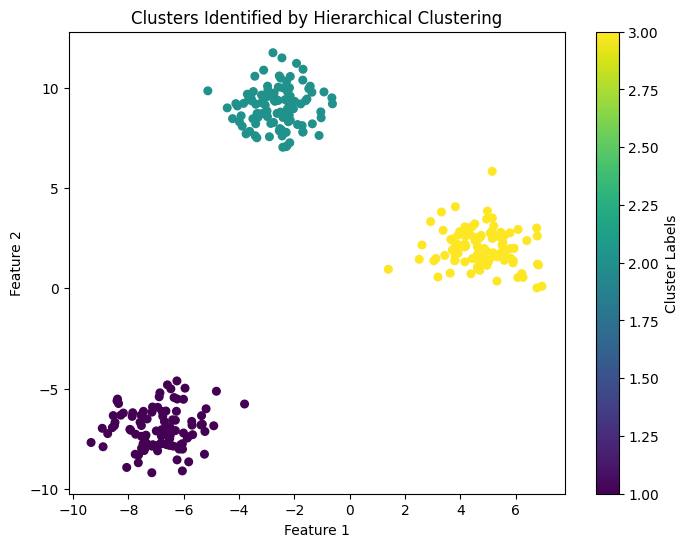

In [14]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_blobs

# Step 1: Generate synthetic data
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42

# Create the dataset
X, y_true = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=random_state)

# Step 2: Perform hierarchical clustering
linkage_matrix = linkage(X, method='ward')  # Ward's method minimizes variance between clusters

# Step 3: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=10., color_threshold=100)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.axhline(y=100, color='red', linestyle='--', label="Cut-off at Height=100")  # Add a horizontal line for the cut-off
plt.legend()
plt.show()

# Step 4: Cut the dendrogram at a specific height to form clusters
# The threshold determines the "cut" height in the dendrogram (e.g., 100)
cluster_labels = fcluster(linkage_matrix, t=100, criterion='distance')

# Step 5: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=30)
plt.title("Clusters Identified by Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster Labels")
plt.show()


In [16]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Simulate labeled and unlabeled data
X_train, X_unlabeled, y_train, y_unlabeled = train_test_split(X, y, test_size=0.9, random_state=42)
y_unlabeled[:] = -1  # Unlabeled data is marked as -1 (unknown)

# Combine labeled and unlabeled data
X_combined = np.vstack((X_train, X_unlabeled))
y_combined = np.hstack((y_train, y_unlabeled))

# Step 2: Define a supervised classifier to use in self-training
base_classifier = RandomForestClassifier(random_state=42)

# Wrap the classifier in a Self-TrainingClassifier
self_training_model = SelfTrainingClassifier(base_classifier, criterion='k_best', k_best=50)

# Step 3: Fit the self-training model on the combined data
self_training_model.fit(X_combined, y_combined)

# Step 4: Test the model on a held-out test set
X_test, y_test = train_test_split(X, test_size=0.1, random_state=42)
y_pred = self_training_model.predict(X_test)

# Step 5: Evaluate the performance
#print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


ValueError: Found input variables with inconsistent numbers of samples: [100, 900]

Accuracy on labeled points: 1.0


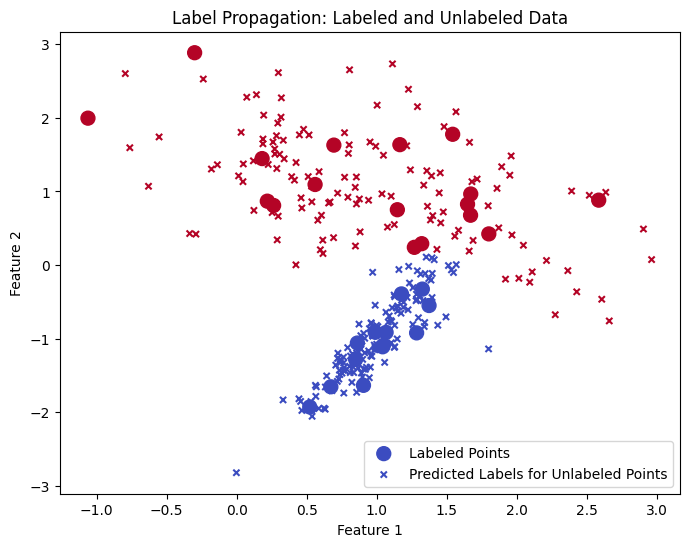

In [17]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.semi_supervised import LabelPropagation
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Step 1: Generate synthetic data
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                           random_state=42, n_clusters_per_class=1)

# Simulate labeled and unlabeled data
n_labeled_points = 30  # Number of labeled points
indices = np.arange(len(y))
np.random.shuffle(indices)

# Separate labeled and unlabeled data
labeled_indices = indices[:n_labeled_points]
unlabeled_indices = indices[n_labeled_points:]

y_unlabeled = -1 * np.ones_like(y)  # Initialize all labels as -1 (unlabeled)
y_unlabeled[labeled_indices] = y[labeled_indices]  # Assign labels to the labeled points

# Step 2: Create and fit the LabelPropagation model
label_propagation = LabelPropagation(kernel='rbf', gamma=20)  # Use RBF kernel with gamma=20
label_propagation.fit(X, y_unlabeled)

# Step 3: Predict labels for all data
y_pred = label_propagation.predict(X)

# Evaluate the accuracy on labeled points
accuracy = accuracy_score(y[labeled_indices], y_pred[labeled_indices])
print("Accuracy on labeled points:", accuracy)

# Step 4: Visualize the results
plt.figure(figsize=(8, 6))

# Plot original labeled points
plt.scatter(X[labeled_indices, 0], X[labeled_indices, 1], c=y[labeled_indices], cmap='coolwarm',
            s=100, marker='o', label='Labeled Points')

# Plot unlabeled points with their predicted labels
plt.scatter(X[unlabeled_indices, 0], X[unlabeled_indices, 1], c=y_pred[unlabeled_indices], cmap='coolwarm',
            s=20, marker='x', label='Predicted Labels for Unlabeled Points')

plt.title('Label Propagation: Labeled and Unlabeled Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


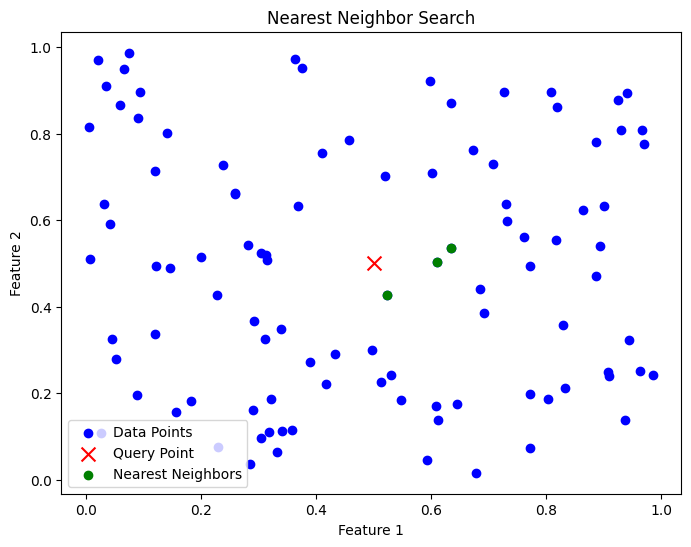

Query Point: [[0.5 0.5]]
Nearest Neighbors' Indices: [[48 73 81]]
Nearest Neighbors' Distances: [[0.07594133 0.10959708 0.13823897]]


In [18]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Step 1: Create a synthetic 2D dataset
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 points in 2D space

# Step 2: Fit the NearestNeighbors model
nbrs = NearestNeighbors(n_neighbors=3, metric='euclidean')
nbrs.fit(X)

# Step 3: Query the nearest neighbors for a given point
query_point = np.array([[0.5, 0.5]])  # Example query point
distances, indices = nbrs.kneighbors(query_point)

# Step 4: Visualize the dataset and the nearest neighbors
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Data Points')
plt.scatter(query_point[:, 0], query_point[:, 1], c='red', marker='x', s=100, label='Query Point')
plt.scatter(X[indices[0], 0], X[indices[0], 1], c='green', label='Nearest Neighbors')
plt.title('Nearest Neighbor Search')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Step 5: Print the results
print("Query Point:", query_point)
print("Nearest Neighbors' Indices:", indices)
print("Nearest Neighbors' Distances:", distances)


/usr/local/lib/python3.11/dist-packages/sklearn/semi_supervised/_label_propagation.py:324: ConvergenceWarning: max_iter=100 was reached without convergence.
  warnings.warn(


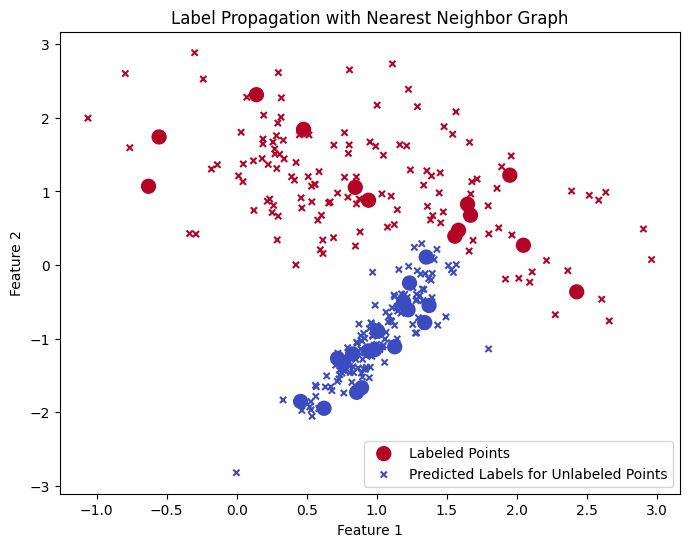

In [19]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import kneighbors_graph
from sklearn.semi_supervised import LabelPropagation

# Step 1: Generate synthetic data
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                           random_state=42, n_clusters_per_class=1)

# Simulate labeled and unlabeled data
n_labeled_points = 30  # Number of labeled points
indices = np.arange(len(y))
np.random.shuffle(indices)

# Separate labeled and unlabeled data
labeled_indices = indices[:n_labeled_points]
unlabeled_indices = indices[n_labeled_points:]

y_unlabeled = -1 * np.ones_like(y)  # Initialize all labels as -1 (unlabeled)
y_unlabeled[labeled_indices] = y[labeled_indices]  # Assign labels to the labeled points

# Step 2: Build a Nearest Neighbors graph
# Create a graph of nearest neighbors (connectivity graph)
n_neighbors = 10  # Number of neighbors for each point
graph = kneighbors_graph(X, n_neighbors=n_neighbors, mode='connectivity', include_self=True)

# Step 3: Perform Label Propagation
# Use the graph for label propagation
label_propagation = LabelPropagation(kernel='knn', gamma=20, max_iter=100)
label_propagation.fit(X, y_unlabeled)

# Step 4: Predict labels
y_pred = label_propagation.transduction_

# Step 5: Visualize the results
plt.figure(figsize=(8, 6))

# Plot labeled points
plt.scatter(X[labeled_indices, 0], X[labeled_indices, 1], c=y[labeled_indices], cmap='coolwarm',
            s=100, marker='o', label='Labeled Points')

# Plot unlabeled points with their predicted labels
plt.scatter(X[unlabeled_indices, 0], X[unlabeled_indices, 1], c=y_pred[unlabeled_indices], cmap='coolwarm',
            s=20, marker='x', label='Predicted Labels for Unlabeled Points')

plt.title('Label Propagation with Nearest Neighbor Graph')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [20]:
# Import necessary libraries
import numpy as np
from sklearn.semi_supervised import LabelPropagation
import matplotlib.pyplot as plt

# Step 1: Generate a synthetic user-item interaction matrix
# Rows: Users, Columns: Items
user_item_matrix = np.array([
    [5, 4, 0, 0, 2],  # User 1
    [0, 0, 4, 3, 5],  # User 2
    [5, 0, 4, 0, 0],  # User 3
    [0, 3, 0, 4, 4],  # User 4
    [3, 0, 4, 5, 0],  # User 5
])

# Replace 0s (unrated items) with -1 for label propagation
labels = user_item_matrix.copy()
labels[labels == 0] = -1  # Unlabeled entries

# Step 2: Build a user-item graph for label propagation
# Similarity matrix between users (using cosine similarity as an example)
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(user_item_matrix)
item_similarity = cosine_similarity(user_item_matrix.T)

# Combine user-user and item-item similarities into a single similarity matrix
# (for demonstration purposes, we consider both users and items as nodes)
combined_similarity = np.block([
    [user_similarity, np.zeros_like(item_similarity)],
    [np.zeros_like(user_similarity), item_similarity],
])

# Step 3: Label Propagation
label_propagation = LabelPropagation(kernel='precomputed', max_iter=100)
label_propagation.fit(combined_similarity, labels.flatten())

# Reshape the predicted labels back into a user-item matrix
predicted_ratings = label_propagation.transduction_.reshape(user_item_matrix.shape)

# Step 4: Fill in the missing ratings
# Replace -1 with the predicted ratings
filled_matrix = user_item_matrix.copy()
filled_matrix[filled_matrix == 0] = np.round(predicted_ratings[filled_matrix == 0])

# Print the results
print("Original User-Item Matrix (with missing values):")
print(user_item_matrix)

print("\nPredicted Ratings (filled matrix):")
print(filled_matrix)


InvalidParameterError: The 'kernel' parameter of LabelPropagation must be a str among {'knn', 'rbf'} or a callable. Got 'precomputed' instead.

In [21]:
# Import necessary libraries
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Step 1: Create a synthetic user-item interaction matrix
# Rows: Users, Columns: Items (ratings from 1-5, 0 means no rating)
user_item_matrix = np.array([
    [5, 4, 0, 0, 2],  # User 1
    [0, 0, 4, 3, 5],  # User 2
    [5, 0, 4, 0, 0],  # User 3
    [0, 3, 0, 4, 4],  # User 4
    [3, 0, 4, 5, 0],  # User 5
])

# Convert to a pandas DataFrame for better readability
users = ['User 1', 'User 2', 'User 3', 'User 4', 'User 5']
items = ['Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5']
df = pd.DataFrame(user_item_matrix, index=users, columns=items)
print("Original User-Item Matrix:\n", df)

# Step 2: Compute User-User Similarity (Cosine Similarity)
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=users, columns=users)
print("\nUser-User Similarity Matrix:\n", user_similarity_df)

# Step 3: Predict Missing Ratings
# Create a copy of the original matrix to hold predictions
predicted_matrix = user_item_matrix.copy()

# For each user and each item, predict missing ratings (if rating = 0)
for user_idx in range(user_item_matrix.shape[0]):
    for item_idx in range(user_item_matrix.shape[1]):
        if user_item_matrix[user_idx, item_idx] == 0:  # Missing rating
            # Weighted sum of ratings from similar users
            numerator = 0
            denominator = 0
            for other_user_idx in range(user_item_matrix.shape[0]):
                # Use only ratings from similar users (non-zero ratings)
                if user_item_matrix[other_user_idx, item_idx] != 0 and user_idx != other_user_idx:
                    similarity = user_similarity[user_idx, other_user_idx]
                    numerator += similarity * user_item_matrix[other_user_idx, item_idx]
                    denominator += abs(similarity)
            # Calculate predicted rating
            predicted_matrix[user_idx, item_idx] = numerator / denominator if denominator != 0 else 0

# Convert predicted matrix to a DataFrame
predicted_df = pd.DataFrame(predicted_matrix, index=users, columns=items)
print("\nPredicted User-Item Matrix:\n", predicted_df)


Original User-Item Matrix:
         Item 1  Item 2  Item 3  Item 4  Item 5
User 1       5       4       0       0       2
User 2       0       0       4       3       5
User 3       5       0       4       0       0
User 4       0       3       0       4       4
User 5       3       0       4       5       0

User-User Similarity Matrix:
           User 1    User 2    User 3    User 4    User 5
User 1  1.000000  0.210819  0.582025  0.465620  0.316228
User 2  0.210819  1.000000  0.353381  0.706762  0.620000
User 3  0.582025  0.353381  1.000000  0.000000  0.684675
User 4  0.465620  0.706762  0.000000  1.000000  0.441726
User 5  0.316228  0.620000  0.684675  0.441726  1.000000

Predicted User-Item Matrix:
         Item 1  Item 2  Item 3  Item 4  Item 5
User 1       5       4       4       4       2
User 2       3       3       4       3       5
User 3       5       4       4       4       3
User 4       4       3       4       4       4
User 5       3       3       4       5       3


In [22]:
# Import the necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Step 1: Sample corpus (list of textual documents)
corpus = [
    "Natural language processing is a branch of AI.",
    "TF-IDF is a popular technique for text feature extraction.",
    "Feature extraction is crucial for text classification.",
    "AI and machine learning are transforming industries.",
    "Text classification often uses feature engineering techniques.",
]

# Step 2: Initialize the TF-IDF Vectorizer
# Configure parameters like 'max_features' or 'stop_words' as needed
vectorizer = TfidfVectorizer(
    stop_words='english',  # Remove common English stopwords
    max_features=10,       # Limit to top 10 features
)

# Step 3: Fit and transform the corpus
X_tfidf = vectorizer.fit_transform(corpus)

# Step 4: Convert the output to a DataFrame for better readability
features = vectorizer.get_feature_names_out()
tfidf_matrix = pd.DataFrame(X_tfidf.toarray(), columns=features)

# Display the TF-IDF matrix
print("TF-IDF Features Matrix:")
print(tfidf_matrix)


TF-IDF Features Matrix:
         ai  classification  extraction   feature   popular  processing  \
0  0.627914        0.000000    0.000000  0.000000  0.000000    0.778283   
1  0.000000        0.000000    0.378316  0.314037  0.468913    0.000000   
2  0.000000        0.544081    0.544081  0.451637  0.000000    0.000000   
3  1.000000        0.000000    0.000000  0.000000  0.000000    0.000000   
4  0.000000        0.505438    0.000000  0.419559  0.000000    0.000000   

   technique  techniques      text        tf  
0   0.000000    0.000000  0.000000  0.000000  
1   0.468913    0.000000  0.314037  0.468913  
2   0.000000    0.000000  0.451637  0.000000  
3   0.000000    0.000000  0.000000  0.000000  
4   0.000000    0.626477  0.419559  0.000000  
